In [34]:
import numpy as np
import scipy as scp
import sys
import os
import keras
import matplotlib.pyplot as plt
from copy import deepcopy
%matplotlib inline

In [10]:
import scipy.integrate 

In [12]:
ndim = 40
nobs = 100
deltaobs = 0.5

In [13]:
def l96rhs(xin, tin, pars):
    F = pars
    ndim, = xin.shape
    # index of the current grid point
    k00 = np.arange(ndim)
    # index for the next grid point
    kp1 = np.mod(np.arange(1,ndim+1), ndim)
    # index for the previous grid point
    km1 = np.mod(np.arange(-1,ndim-1), ndim)
    # index for previous to previous grid point
    km2 = np.mod(np.arange(-2,ndim-2), ndim)
    frhs = (xin[kp1] - xin[km2]) * xin[km1] - xin[k00] + F
    return frhs

In [16]:
TM = l96rhs

In [17]:
xrand = np.random.rand(ndim)
ttrans = np.linspace(0,100,1000)
pars = 8
xtrans = scp.integrate.odeint(TM, xrand, ttrans, (pars,))

xattr = xtrans[-1,:]

tend = nobs * deltaobs
tobs = np.linspace(0, tend, num=nobs+1)
ttraj = np.linspace(0, tend, num=nobs*100+1)

## generate true trajectory
truetraj = scp.integrate.odeint(TM, xattr, ttraj, (pars,))
truestate = truetraj[::100,:]
truestate = truestate.T

xattr = truestate[:,0]

In [21]:
tlong = np.linspace(0,100,10000)
xlong = scp.integrate.odeint(TM, xattr, tlong, (pars,))


In [23]:
xlong.shape

(10000, 40)

In [33]:
truetraj.shape

(10001, 40)

In [26]:
truestate.shape

(40, 101)

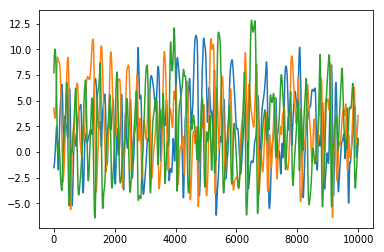

In [32]:
plt.plot(truetraj[:,:3])

In [35]:
all_X = deepcopy(truetraj[:-1,:])
all_Y = deepcopy(truetraj[1:,:])


In [83]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, LeakyReLU
from keras.initializers import glorot_normal
from keras.regularizers import l2

In [102]:
l_specs = [ndim,ndim,ndim,ndim,ndim,ndim,ndim]
l_num = len(l_specs)

model = Sequential()

#model.add(BatchNormalization(input_shape=(2,)))
for _i in range(l_num-1):
    model.add(Dense(l_specs[_i+1], input_dim=l_specs[_i], kernel_initializer='glorot_normal',kernel_regularizer=l2(0.01)))
    model.add(Activation('tanh'))
    model.add(BatchNormalization(input_shape=(l_specs[_i+1],)))

    model.add(Dense(ndim, input_dim=l_specs[-1],activation='linear'))

model.compile(optimizer='adam',loss='mse')

In [93]:
from sklearn.model_selection import train_test_split

# Split the data
x_train, x_test, y_train, y_test = train_test_split(all_X, all_Y, test_size=0.2, shuffle= True)

In [100]:
train_index = np.random.permutation(8000)

In [103]:
x_train = all_X[train_index,:]
y_train = all_Y[train_index,:]
x_test  = all_X[8000:,:]
y_test  = all_Y[8000:,:]

In [104]:
x_train.shape

(8000, 40)

In [105]:
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, verbose=2, mode='auto', baseline=None, restore_best_weights=True)

In [106]:
model.fit(x_train,y_train,validation_split=0.2,epochs=5000,batch_size=500,callbacks=[es_callback,])

Train on 6400 samples, validate on 1600 samples
Epoch 1/5000
6400/6400 [==============================] - 5s 758us/step - loss: 20.2636 - val_loss: 18.9888
Epoch 2/5000
6400/6400 [==============================] - 0s 30us/step - loss: 18.3837 - val_loss: 17.7125
Epoch 3/5000
6400/6400 [==============================] - 0s 36us/step - loss: 17.2738 - val_loss: 16.7766
Epoch 4/5000
6400/6400 [==============================] - 0s 29us/step - loss: 16.3575 - val_loss: 15.9867
Epoch 5/5000
6400/6400 [==============================] - 0s 28us/step - loss: 15.5297 - val_loss: 15.2959
Epoch 6/5000
6400/6400 [==============================] - 0s 32us/step - loss: 14.7463 - val_loss: 14.6134
Epoch 7/5000
6400/6400 [==============================] - 0s 30us/step - loss: 13.9901 - val_loss: 13.9546
Epoch 8/5000
6400/6400 [==============================] - 0s 31us/step - loss: 13.2268 - val_loss: 13.3064
Epoch 9/5000
6400/6400 [==============================] - 0s 29us/step - loss: 12.4533 - val_lo

6400/6400 [==============================] - 0s 33us/step - loss: 1.5276 - val_loss: 1.9508
Epoch 78/5000
6400/6400 [==============================] - 0s 28us/step - loss: 1.5085 - val_loss: 1.9304
Epoch 79/5000
6400/6400 [==============================] - 0s 32us/step - loss: 1.5020 - val_loss: 1.9467
Epoch 80/5000
6400/6400 [==============================] - 0s 29us/step - loss: 1.4919 - val_loss: 1.8980
Epoch 81/5000
6400/6400 [==============================] - 0s 31us/step - loss: 1.4754 - val_loss: 1.8238
Epoch 82/5000
6400/6400 [==============================] - 0s 28us/step - loss: 1.4439 - val_loss: 1.8452
Epoch 83/5000
6400/6400 [==============================] - 0s 29us/step - loss: 1.4450 - val_loss: 1.8030
Epoch 84/5000
6400/6400 [==============================] - 0s 28us/step - loss: 1.4236 - val_loss: 1.7675
Epoch 85/5000
6400/6400 [==============================] - 0s 32us/step - loss: 1.4027 - val_loss: 1.7610
Epoch 86/5000
6400/6400 [==============================] - 0

Epoch 154/5000
6400/6400 [==============================] - 0s 30us/step - loss: 0.9036 - val_loss: 1.0375
Epoch 155/5000
6400/6400 [==============================] - 0s 29us/step - loss: 0.8885 - val_loss: 1.0451
Epoch 156/5000
6400/6400 [==============================] - 0s 29us/step - loss: 0.8820 - val_loss: 1.0406
Epoch 157/5000
6400/6400 [==============================] - 0s 31us/step - loss: 0.8745 - val_loss: 1.0269
Epoch 158/5000
6400/6400 [==============================] - 0s 34us/step - loss: 0.8701 - val_loss: 1.0402
Epoch 159/5000
6400/6400 [==============================] - 0s 55us/step - loss: 0.8590 - val_loss: 1.0443
Epoch 160/5000
6400/6400 [==============================] - 0s 36us/step - loss: 0.8456 - val_loss: 1.0563
Epoch 161/5000
6400/6400 [==============================] - 0s 34us/step - loss: 0.8570 - val_loss: 1.0441
Epoch 162/5000
6400/6400 [==============================] - 0s 42us/step - loss: 0.8525 - val_loss: 1.0526
Epoch 163/5000
6400/6400 [===========

6400/6400 [==============================] - 0s 26us/step - loss: 0.6239 - val_loss: 0.7035
Epoch 231/5000
6400/6400 [==============================] - 0s 25us/step - loss: 0.6233 - val_loss: 0.7287
Epoch 232/5000
6400/6400 [==============================] - 0s 26us/step - loss: 0.6286 - val_loss: 0.6911
Epoch 233/5000
6400/6400 [==============================] - 0s 25us/step - loss: 0.6224 - val_loss: 0.6915
Epoch 234/5000
6400/6400 [==============================] - 0s 37us/step - loss: 0.6226 - val_loss: 0.6895
Epoch 235/5000
6400/6400 [==============================] - 0s 29us/step - loss: 0.6143 - val_loss: 0.6964
Epoch 236/5000
6400/6400 [==============================] - 0s 40us/step - loss: 0.6140 - val_loss: 0.6810
Epoch 237/5000
6400/6400 [==============================] - 0s 50us/step - loss: 0.6223 - val_loss: 0.6894
Epoch 238/5000
6400/6400 [==============================] - 0s 34us/step - loss: 0.6184 - val_loss: 0.6877
Epoch 239/5000
6400/6400 [==========================

6400/6400 [==============================] - 0s 31us/step - loss: 0.5079 - val_loss: 0.5109
Epoch 307/5000
6400/6400 [==============================] - 0s 45us/step - loss: 0.4938 - val_loss: 0.5010
Epoch 308/5000
6400/6400 [==============================] - 0s 36us/step - loss: 0.4994 - val_loss: 0.4948
Epoch 309/5000
6400/6400 [==============================] - 0s 43us/step - loss: 0.4902 - val_loss: 0.4964
Epoch 310/5000
6400/6400 [==============================] - 0s 53us/step - loss: 0.4933 - val_loss: 0.5032
Epoch 311/5000
6400/6400 [==============================] - 0s 38us/step - loss: 0.4898 - val_loss: 0.4984
Epoch 312/5000
6400/6400 [==============================] - 0s 38us/step - loss: 0.4801 - val_loss: 0.4895
Epoch 313/5000
6400/6400 [==============================] - 0s 38us/step - loss: 0.4798 - val_loss: 0.4878
Epoch 314/5000
6400/6400 [==============================] - 0s 49us/step - loss: 0.4934 - val_loss: 0.4843
Epoch 315/5000
6400/6400 [==========================

6400/6400 [==============================] - 0s 35us/step - loss: 0.4184 - val_loss: 0.4302
Epoch 383/5000
6400/6400 [==============================] - 0s 37us/step - loss: 0.4144 - val_loss: 0.4228
Epoch 384/5000
6400/6400 [==============================] - 0s 40us/step - loss: 0.4225 - val_loss: 0.4273
Epoch 385/5000
6400/6400 [==============================] - 0s 36us/step - loss: 0.4131 - val_loss: 0.4183
Epoch 386/5000
6400/6400 [==============================] - 0s 30us/step - loss: 0.4187 - val_loss: 0.3929
Epoch 387/5000
6400/6400 [==============================] - 0s 31us/step - loss: 0.4145 - val_loss: 0.3913
Epoch 388/5000
6400/6400 [==============================] - 0s 45us/step - loss: 0.4110 - val_loss: 0.4007
Epoch 389/5000
6400/6400 [==============================] - 0s 42us/step - loss: 0.4087 - val_loss: 0.4092
Epoch 390/5000
6400/6400 [==============================] - 0s 36us/step - loss: 0.4117 - val_loss: 0.4300
Epoch 391/5000
6400/6400 [==========================

6400/6400 [==============================] - 0s 43us/step - loss: 0.3626 - val_loss: 0.3548
Epoch 459/5000
6400/6400 [==============================] - 0s 40us/step - loss: 0.3591 - val_loss: 0.3558
Epoch 460/5000
6400/6400 [==============================] - 0s 30us/step - loss: 0.3675 - val_loss: 0.3613
Epoch 461/5000
6400/6400 [==============================] - 0s 38us/step - loss: 0.3676 - val_loss: 0.3500
Epoch 462/5000
6400/6400 [==============================] - 0s 42us/step - loss: 0.3707 - val_loss: 0.3626
Epoch 463/5000
6400/6400 [==============================] - 0s 35us/step - loss: 0.3585 - val_loss: 0.3604
Epoch 464/5000
6400/6400 [==============================] - 0s 42us/step - loss: 0.3599 - val_loss: 0.3697
Epoch 465/5000
6400/6400 [==============================] - 0s 49us/step - loss: 0.3635 - val_loss: 0.3675
Epoch 466/5000
6400/6400 [==============================] - 0s 30us/step - loss: 0.3627 - val_loss: 0.3574
Epoch 467/5000
6400/6400 [==========================

6400/6400 [==============================] - 0s 41us/step - loss: 0.3209 - val_loss: 0.2889
Epoch 535/5000
6400/6400 [==============================] - 0s 42us/step - loss: 0.3376 - val_loss: 0.3096
Epoch 536/5000
6400/6400 [==============================] - 0s 37us/step - loss: 0.3275 - val_loss: 0.3057
Epoch 537/5000
6400/6400 [==============================] - 0s 37us/step - loss: 0.3231 - val_loss: 0.3049
Epoch 538/5000
6400/6400 [==============================] - 0s 49us/step - loss: 0.3316 - val_loss: 0.3081
Epoch 539/5000
6400/6400 [==============================] - 0s 34us/step - loss: 0.3213 - val_loss: 0.3008
Epoch 540/5000
6400/6400 [==============================] - 0s 43us/step - loss: 0.3246 - val_loss: 0.2907
Epoch 541/5000
6400/6400 [==============================] - 0s 34us/step - loss: 0.3234 - val_loss: 0.2896
Epoch 542/5000
6400/6400 [==============================] - 0s 36us/step - loss: 0.3179 - val_loss: 0.2892
Epoch 543/5000
6400/6400 [==========================

6400/6400 [==============================] - 0s 30us/step - loss: 0.2856 - val_loss: 0.2818
Epoch 611/5000
6400/6400 [==============================] - 0s 31us/step - loss: 0.3012 - val_loss: 0.2897
Epoch 612/5000
6400/6400 [==============================] - 0s 33us/step - loss: 0.2900 - val_loss: 0.3057
Epoch 613/5000
6400/6400 [==============================] - 0s 33us/step - loss: 0.2995 - val_loss: 0.2987
Epoch 614/5000
6400/6400 [==============================] - 0s 32us/step - loss: 0.2920 - val_loss: 0.2945
Epoch 615/5000
6400/6400 [==============================] - 0s 31us/step - loss: 0.3027 - val_loss: 0.2930
Epoch 616/5000
6400/6400 [==============================] - 0s 32us/step - loss: 0.2888 - val_loss: 0.2895
Epoch 617/5000
6400/6400 [==============================] - 0s 31us/step - loss: 0.2916 - val_loss: 0.3065
Epoch 618/5000
6400/6400 [==============================] - 0s 31us/step - loss: 0.2927 - val_loss: 0.2924
Epoch 619/5000
6400/6400 [==========================

6400/6400 [==============================] - 0s 31us/step - loss: 0.2666 - val_loss: 0.2466
Epoch 687/5000
6400/6400 [==============================] - 0s 32us/step - loss: 0.2732 - val_loss: 0.2584
Epoch 688/5000
6400/6400 [==============================] - 0s 30us/step - loss: 0.2787 - val_loss: 0.2520
Epoch 689/5000
6400/6400 [==============================] - 0s 30us/step - loss: 0.2581 - val_loss: 0.2462
Epoch 690/5000
6400/6400 [==============================] - 0s 32us/step - loss: 0.2698 - val_loss: 0.2550
Epoch 691/5000
6400/6400 [==============================] - 0s 34us/step - loss: 0.2679 - val_loss: 0.2478
Epoch 692/5000
6400/6400 [==============================] - 0s 29us/step - loss: 0.2713 - val_loss: 0.2420
Epoch 693/5000
6400/6400 [==============================] - 0s 31us/step - loss: 0.2672 - val_loss: 0.2401
Epoch 694/5000
6400/6400 [==============================] - 0s 33us/step - loss: 0.2638 - val_loss: 0.2366
Epoch 695/5000
6400/6400 [==========================

6400/6400 [==============================] - 0s 31us/step - loss: 0.2592 - val_loss: 0.2213
Epoch 763/5000
6400/6400 [==============================] - 0s 28us/step - loss: 0.2508 - val_loss: 0.2068
Epoch 764/5000
6400/6400 [==============================] - 0s 30us/step - loss: 0.2639 - val_loss: 0.2165
Epoch 765/5000
6400/6400 [==============================] - 0s 33us/step - loss: 0.2642 - val_loss: 0.2314
Epoch 766/5000
6400/6400 [==============================] - 0s 32us/step - loss: 0.2658 - val_loss: 0.2257
Epoch 767/5000
6400/6400 [==============================] - 0s 33us/step - loss: 0.2534 - val_loss: 0.2372
Epoch 768/5000
6400/6400 [==============================] - 0s 32us/step - loss: 0.2439 - val_loss: 0.2160
Epoch 769/5000
6400/6400 [==============================] - 0s 34us/step - loss: 0.2475 - val_loss: 0.2123
Epoch 770/5000
6400/6400 [==============================] - 0s 31us/step - loss: 0.2455 - val_loss: 0.2073
Epoch 771/5000
6400/6400 [==========================

6400/6400 [==============================] - 0s 31us/step - loss: 0.2394 - val_loss: 0.1979
Epoch 839/5000
6400/6400 [==============================] - 0s 33us/step - loss: 0.2429 - val_loss: 0.2065
Epoch 840/5000
6400/6400 [==============================] - 0s 33us/step - loss: 0.2483 - val_loss: 0.2090
Epoch 841/5000
6400/6400 [==============================] - 0s 31us/step - loss: 0.2369 - val_loss: 0.2042
Epoch 842/5000
6400/6400 [==============================] - 0s 29us/step - loss: 0.2508 - val_loss: 0.2133
Epoch 843/5000
6400/6400 [==============================] - 0s 30us/step - loss: 0.2447 - val_loss: 0.2119
Epoch 844/5000
6400/6400 [==============================] - 0s 32us/step - loss: 0.2405 - val_loss: 0.2019
Epoch 845/5000
6400/6400 [==============================] - 0s 30us/step - loss: 0.2428 - val_loss: 0.1953
Epoch 846/5000
6400/6400 [==============================] - 0s 32us/step - loss: 0.2364 - val_loss: 0.1961
Epoch 847/5000
6400/6400 [==========================

In [107]:
y_pred = model.predict(x_test)

In [130]:
y_pred_all = model.predict(all_X)

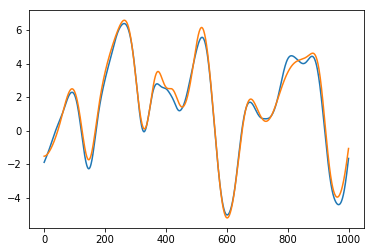

In [132]:
plt.plot(y_pred_all[:1000,0])
plt.plot(all_Y[:1000,0])

In [118]:
np.linalg.norm(y_pred - y_test,axis=1).mean()

9.440581273681092

In [108]:
np.linalg.norm(y_pred - y_test,axis=1) / np.linalg.norm(y_test,axis=1)

array([0.14949997, 0.15437589, 0.15936379, ..., 0.26018051, 0.26071107,
       0.26098501])

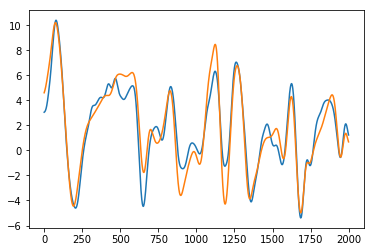

In [111]:
plt.plot(y_pred[:,0])
plt.plot(y_test[:,0])

In [70]:
model.count_params()

20640

In [120]:
y_independent = np.zeros([2000,40])

In [123]:
y_independent[0,:] = model.predict(x_test[[0,],:]) 

In [124]:
for i in range(1,2000):
    y_independent[i,:] = model.predict(y_independent[[i-1,],:])

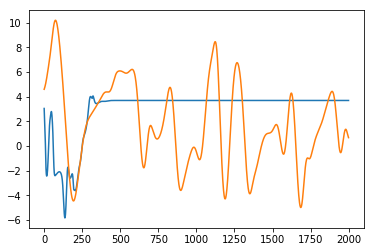

In [128]:
plt.plot(y_independent[:,0])
plt.plot(y_test[:,0])

In [134]:
from pyESN import ESN

In [136]:
data = truetraj #  http://minds.jacobs-university.de/mantas/code
esn = ESN(n_inputs = 1,
          n_outputs = 40,
          n_reservoir = 500,
          spectral_radius = 1.5,
          random_state=100)

trainlen = 8000
future = 2001
pred_training = esn.fit(np.ones(trainlen),data[:trainlen])

prediction = esn.predict(np.ones(future))
print("test error: \n"+str(np.sqrt(np.mean((prediction.flatten() - data[trainlen:trainlen+future])**2))))

plt.figure(figsize=(11,1.5))
plt.plot(range(0,trainlen+future),data[0:trainlen+future],'k',label="target system")
plt.plot(range(trainlen,trainlen+future),prediction,'r', label="free running ESN")
lo,hi = plt.ylim()
plt.plot([trainlen,trainlen],[lo+np.spacing(1),hi-np.spacing(1)],'k:')
plt.legend(loc=(0.61,1.1),fontsize='x-small')

ValueError: operands could not be broadcast together with shapes (80040,) (2001,40) 

In [135]:
truetraj.shape

(10001, 40)

In [137]:
prediction.shape

(2001, 40)

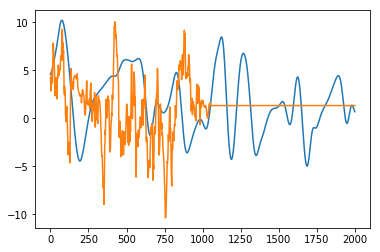

In [139]:
plt.plot(data[trainlen:trainlen+future,0])
plt.plot(prediction[:,0])